# 수포자를 위한 머신러닝의 이해

몇년전부터 빅데이타와 머신러닝이 유행하면서 이분야를 공부해야겠다고 생각을 하고 코세라의 Andrew.NG 교수님의 강의도 듣고, 통계학 책도 보고, 수학적인 지식이 부족해서 고등학교 수학 참고서도 봤지만, 도저히 답이 나오지 않는다. 머신 러닝에 사용되는 알고리즘은 복잡도가 높고 일반적인 수학 지식으로 이해조차 어려운데, 실제 운영 시스템에 적용할 수 있는 수준의 알고리즘은 석박사급의 전문가적인 지식이 아니면 쉽게 만들 수 없는 것으로 보였다. 예를 들어 인공지능망(뉴럴네트워크:Neural Network) 알고리즘에 대한 원리는 이해할 수 있지만, 실제로 서비스에 사용되는 알고르즘을 보니 보통 60~90개의 계층으로 이루어져 있는데, (그냥 복잡하다는 이야기로 이해하면 됨) 이런 복잡한 알고리즘을 수학 초보자인 내가 만든다는 것은 거의 불가능에 가까워 보였고, 이런것을 만들기 위해서 몇년의 시간을 투자해서 머신러닝 전문가로 커리어패스를 전환할 수 는 있겠지만 많은 시간과 노력이 드는데 반해서, 이미 나에게는 소프트웨어 개발과 백앤드 시스템이라는 전문분야가 있어싸. 

그래도 조금씩 보다보니, 머신 러닝에서 소개되는 알고리즘은 주로 사용되는 것은 약 20개 내외였고, 이미 다 정형화 되어 있어서 그 알고리즘을 만들어내기보다는, 가져다 쓰기만 하면 될 것 같다는 느낌이 들었다. 아직 많이 보지는 못했지만, 실제로 머신 러닝 기반의 시스템들은 나와 있는 알고리즘을 코드로 옮겨서 운영 환경에 올리는 경우가 대부분이었다.

비유를 하자면 우리가 복잡한 해쉬 리스트나, 소팅 알고리즘을 모르고도 간단하게 프로그래밍 언어에 있는 라이브러리를 가져다 쓰는 것과 같은 원리라고나 할까?
그래서, 완벽하게 이해하고 만들기 보다는 기본적인 원리를 파악하고 이미 공개된 알고리즘과 특히 레퍼런스 코드를 가져다가 운영환경에다 쓸 수 있는 정도의 수준을 목표로 하기로 했다. 

이제 아주 아주 초보적인 수준의 이해를 가지고, 구글의 텐서플로우 기반으로 머신러닝과 딥러닝을 공부하면서 내용을 공유하고자 한다. 글을 쓰는 나역시도 수포자이며 머신러닝에 대한 초보자이기 때문에, 설명이 부족할 수 도 있고, 틀린 내용이 있을 수 있음을 미리 알리고 시작한다. (틀린 내용은 알려주세요)  


## Linear Regression을 통한 머신 러닝의 개념 이해

머신러닝이란 무엇일까? 개념 이해를 돕기 위해서 선형 회귀 (Linear Regression)이라는 머신러닝 모델을 보자
먼저 선형 회귀 (Linear regression)이 무엇인지 부터 이해를 해야 하는데,예를 들어서 설명해보자, 택시 요금을 예로 들어보자,택시 요금은 물론 막히냐 마냐에 따라 편차가 있지만, 대부분 거리에 비례해서 요금이 부과된다. 
거리별 요금을 그래프로 나타내보면 대략 다음과 같은 분포를 띄게 된다

In [4]:
import numpy as np
num_points = 200
vectors_set = []
for i in xrange(num_points):
  x = np.random.normal(5,5)+15
  #y = (x-100)*0.90 + np.random.random_integers(-4,4)
  y =  x*1000+ (np.random.normal(0,3))*1000
  vectors_set.append([x,y])
  
x_data = [v[0] for v in vectors_set ]
y_data = [v[1] for v in vectors_set ]

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:531: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



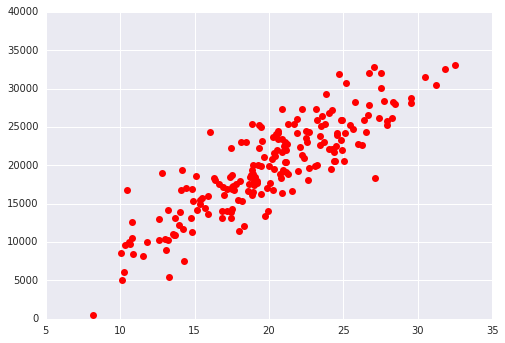

In [5]:
import matplotlib.pyplot as plt
plt.plot(x_data,y_data,'ro')
plt.ylim([0,40000])
plt.xlim([5,35])
plt.legend()
plt.show()

거리와 요금이 서로 비례하기 때문에, 거리(X)와 요금(Y)간의 상관 관계는 다음과 같이 일차 방정식 형태의 그래프를 그리게 된다.

> y = Wx * b

그럼 일차 방정식 형태로 대충 1차원 그래프를 그려보자 같은 형태로 아래와 같이 그래프를 그려봤다. 

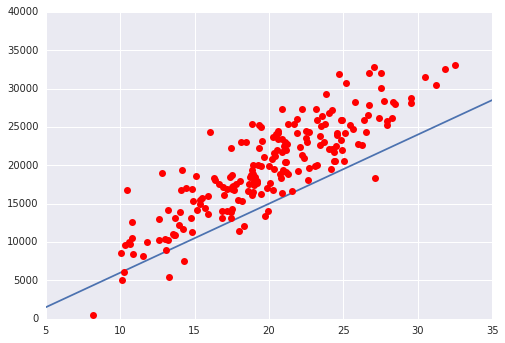

In [6]:
import matplotlib.pyplot as plt 
import numpy as np

def f(x):
	return x*900 -3000

x1= np.linspace(0,35,1000)	
plt.plot(x1,f(x1))
plt.plot(x_data,y_data,'ro')
plt.ylim([0,40000])
plt.xlim([5,35])
plt.legend()
plt.show()

그래프를 위로 올려서 다시 보정해보자

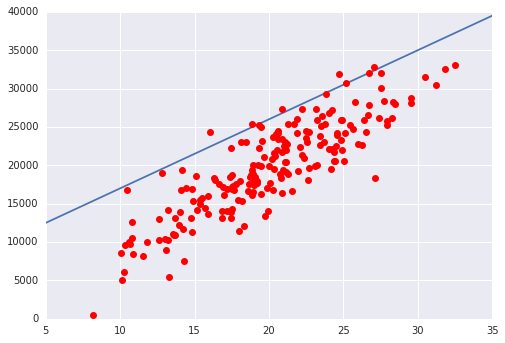

In [7]:
import matplotlib.pyplot as plt 
import numpy as np

def f(x):
	return x*900 +8000

x1= np.linspace(0,35,1000)	
plt.plot(x1,f(x1))
plt.plot(x_data,y_data,'ro')
plt.ylim([0,40000])
plt.xlim([5,35])
plt.legend()
plt.show()

그래프를 아래로 옮겨서 다시 보정해보자

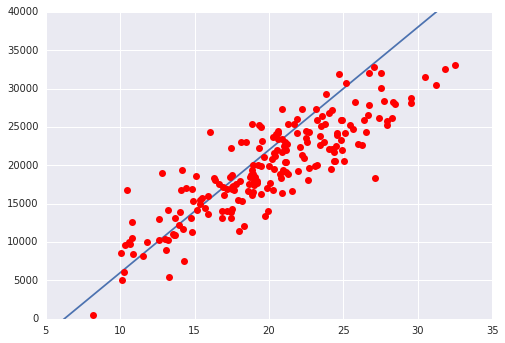

In [8]:
import matplotlib.pyplot as plt 
import numpy as np

def f(x):
	return x*1600-10000

x1= np.linspace(0,35,1000)	
plt.plot(x1,f(x1))
plt.plot(x_data,y_data,'ro')
plt.ylim([0,40000])
plt.xlim([5,35])
plt.legend()
plt.show()

그러면 실제로 선형 회귀 분석을 이용해서 W와 b값을 구하는 머신러닝 모델을 텐서 플로우로 구현해보자. 

(0, array([ 1260.54467773], dtype=float32), array([ 59.16593552], dtype=float32))
(0, 40440848.0)


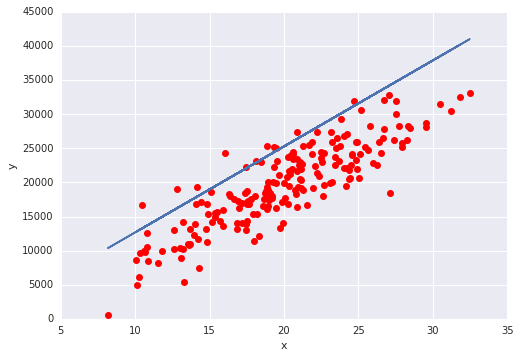

(1, array([ 916.99316406], dtype=float32), array([ 42.6584816], dtype=float32))
(1, 11760585.0)


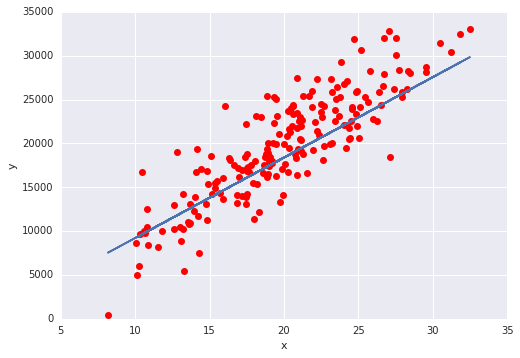

(2, array([ 1010.69439697], dtype=float32), array([ 46.78658295], dtype=float32))
(2, 9627848.0)


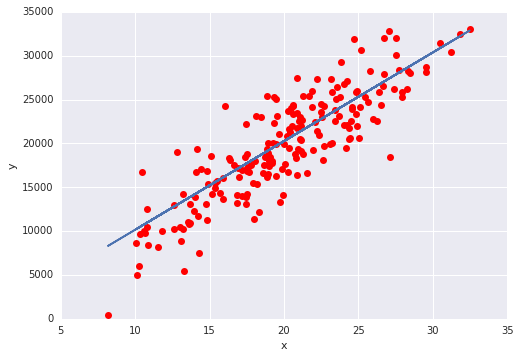

(3, array([ 985.16046143], dtype=float32), array([ 45.28760529], dtype=float32))
(3, 9469203.0)


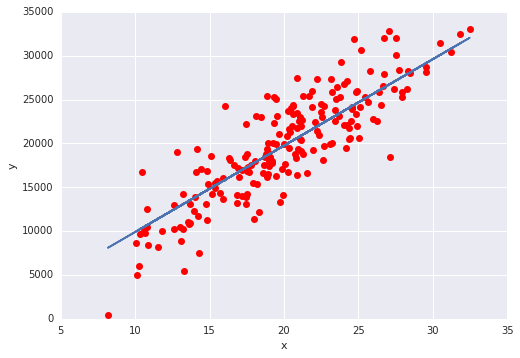

(4, array([ 992.14099121], dtype=float32), array([ 45.32315063], dtype=float32))
(4, 9457353.0)


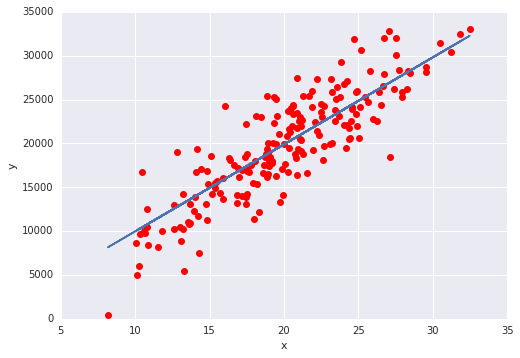

(5, array([ 990.25506592], dtype=float32), array([ 44.94030762], dtype=float32))
(5, 9456418.0)


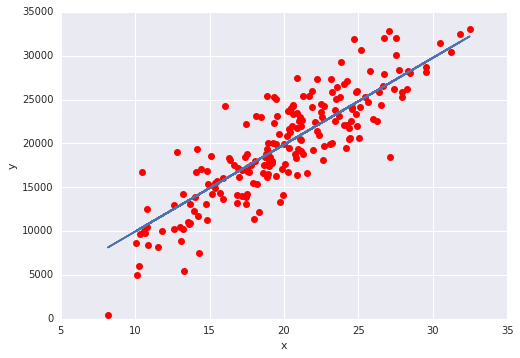

(6, array([ 990.7869873], dtype=float32), array([ 44.67161942], dtype=float32))
(6, 9456294.0)


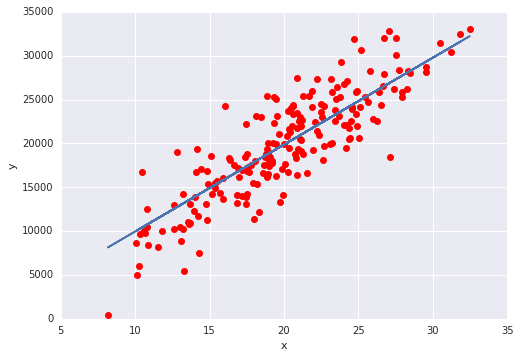

(7, array([ 990.65948486], dtype=float32), array([ 44.3718605], dtype=float32))
(7, 9456233.0)


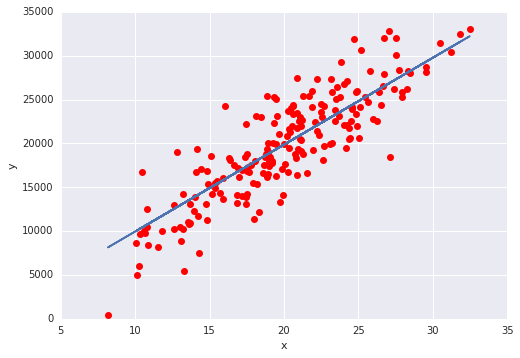

(8, array([ 990.71191406], dtype=float32), array([ 44.08064651], dtype=float32))
(8, 9456175.0)


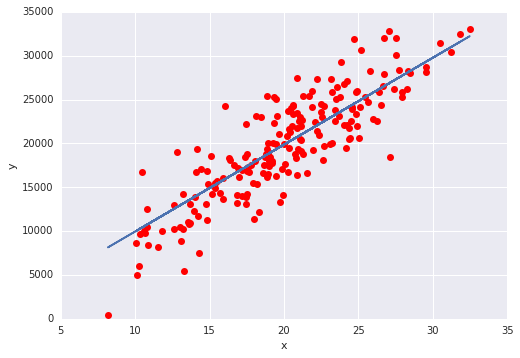

(9, array([ 990.71514893], dtype=float32), array([ 43.78716278], dtype=float32))
(9, 9456117.0)


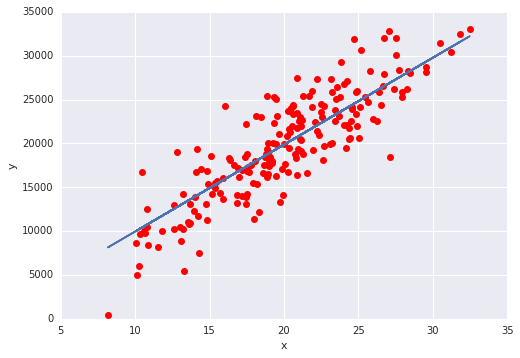

In [26]:
import tensorflow as tf

W = tf.Variable(tf.random_uniform([1],-1.0,1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.0015)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

for step in xrange(10):
  sess.run(train)
  print(step,sess.run(W),sess.run(b))
  print(step,sess.run(loss))
  
  plt.plot(x_data,y_data,'ro')
  plt.plot(x_data,sess.run(W)*x_data + sess.run(b))
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()
  
  
